# Stock Market Time-Series Analysis and Forecasting in Python
------
### Introduction to the Stock Market
The New York Stock Exchange (NYSE), the American stock exchange, 
sanctions the buying and trading of shares for publicly 
registered companies. The public stock exchange allows businesses to
raise financial capital by selling shares of ownership. The value of a share to 
investors is measured by a stock price. There are many variables and uncertainties which
can influence a stock's price away from market equilibrium. Overly optimistic or pessimistic 
conditions can drive stock value excessively high or low. The erratic nature of 
stock behavior creates a market risk. Investors look for stocks with 
value expected to rise while avoiding stocks with value expected to decrease.
Knowledge of stock price movement is essential for minimizing market risk.    

### Objective
The goal of this project is to explore the process of knowledge discovery from
financial data (financial KDD) for several stocks in the technology sector (listed in table). 
The information (historical stock quotes) will be retrieved live from the Yahoo! Finance web service. 
The Collected information is then formatted as a financial time series. 
This mathematical model is ideal for finding statistical descriptions and data visualizations of 
asset evaluation over time. 

| Technology Stock | Ticker |
|---------------|--------------|
| Adv Micro Devices | (**AMD**) | 
| Cisco Systems Inc | (**CSCO**) | 
| Intel Corp | (**INTC**) | 
| Micron Technology | (**MU**) | 
| Oracle Corp | (**ORCL**) | 
| Qualcomm Inc | (**QCOM**) | 

The process of knowledge discovery from the financial data will be split into two parts:
   
**Part 1**: For the first part, interesting knowledge will be discovered using statistical methods. These will describe 
the collection, analysis, interpretation, and presentation of the data. A *statistical model* is established
mathematical functions describing the behavior of objects in terms of random variables and their associated
probability distributions. This Project is based on the previously mentioned statistical model 
known as a time series. A central idea of the project will be understanding a financial time series using 
*statistical descriptions*. These will be used to identify the properties of the series and find 
data values which are noise or outliers. This will merge with the last concept of Part 1, *relevance analysis*, 
which is the first step in the data mining functionality: Classification and Regression for Predictive Analysis. 
This is described as attempting to identify attributes which are more relevant to the predictive process. 

**Part 2**: The second part of the knowledge discovery from data (KDD) process is based on 
the *predictive analysis* concepts of the data mining functionality: Classification and Regression for 
Predictive Analysis. This predictive process will be a type of *Supervised Learning* because the extracted 
dataset serves as "supervision" for the learning process. Attributes from the preprocessed 
data in Part 1 will make up the training set for the Classification learning phase. A classifier will 
be constructed to predict a financial attribute.    

### Outline
* **Time Series Analysis:**
    * Describe Time Series
         - Definition
         - Frequency
    * Getting Stock Price Quotes
         - Python Package Imports
         - Getting Stock Quote Data
         - Grouping Quotes
         - Visualize a Time Series
    * Exploring Time Series Data
         - Data Structure
         - Descriptive Statistics
         - Daily Returns
         - Percent Change
         - Percent Change Observations
         - Visualizing Daily Returns
    * Stationary Properties of Time Series
         -Description
         -Decomposition
         -Trend variations
         -Seasonal variations
         -Irregular variations
* **Predictive Process:**
    * Exponential Smoothing
    * Predictive Analysis










# (Part 1) Time Series Analysis
---------------
## Description
------
### Definition:

The **Time Series** on a variable/attribute *a* is indicated as *a<sub>t</sub>*, with the subscript t 
representing time. The first and last observations available on attribute *a* are at t = 1, and t = T.


The set of times t = {1, 2,.. ,T} is referred to as the *observation period*.
<pre>    
    Observations are typically measured in equally spaced intervals (frequency), (i.e minute, hour, 
    day, etc... for finance). 
</pre>

Essentially, a time series contains quantitative observations on one or more assessable characteristics of
an entity, taken at multiple points in time. 

### Frequency

Financial data is a *fixed frequency* time series, meaning the 
data points occur at regular intervals. This project will focus on financial time series with a daily 
frequency. Higher frequencies in financial time series is referred to as "high frequency" or "tick-by-tick" data.
   
### Analysis:

time series analysis applies different statistical methods to explore and model the internal 
structures of the time series data. 

Several interesting internal structures are:  trend, seasonality, stationarity, autocorrelation, etc..

The internal structures require special formulation and techniques for their analysis 


## Getting Stock Price Quotes
-----
### Time Series Package Imports

In [ ]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


### Getting Stock Quote Data
The *historical stock quote* is made up of tuples with 6 associated class labels.
Therefore, a tuple is represented as a 6-dimensional attribute vector (High, Low, Open, Close, Volume, Adj Close).

Attribute Information:

*   High: The highest share price for Date
*   Low: The lowest share price for Date
*   Open: The opening share price on Date
*   Close: The closing share price on Date
*   Volume: The number of shares traded on Date
*   Adj Close: The closing price adjusted for stock splits and dividends

The pandas_datareader.Data module returns a *Panel* object. This can be represented as a
3-Dimensional matrix. The first dimension are the date-time indexes, 
the second dimension is made up of the six attributes Yahoo! Finance returns, 
the third dimension are the ticker identifiers. 


In [91]:
#  Stock tickers to retrieve historical index data
ticker_index_data = ['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM']

start = '2017-10-10'
end = '2019-04-10'
#  Assign a database with historical stock quotes from Yahoo! Finance to each ticker
for ticker in ticker_index_data:
    globals()[ticker] = data.get_data_yahoo(ticker, start, end)
                                                    #  Changed start to 1.5 years

Use the pandas DataFrame **.tail()** method to show the most recent five rows of AMD stock 
quotes

In [4]:
#  Five most recent rows of DataFrame
AMD.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-05,29.690001,28.799999,29.639999,28.980000,65662700,28.980000
2019-04-08,28.950001,28.180000,28.690001,28.530001,58002500,28.530001
2019-04-09,28.379999,27.190001,28.240000,27.240000,75539800,27.240000
2019-04-10,28.120001,27.320000,27.459999,27.830000,64368100,27.830000
2019-04-11,28.049999,27.459999,27.809999,27.790001,44801200,27.790001


### Group Technology Stock Price Quotes 
Use the pandas Series concat() method to concatenate pandas objects.   


In [105]:
#  The "axis" param of 1 represents concatenating along the column axis. 
#  The "keys" param is a hierarchical index for each technology stock ticker.
tech_stocks = pd.concat([AMD, CSCO, INTC, MU, ORCL, QCOM], axis=1, keys=ticker_index_data)
tech_stocks.columns.names = ['Stock Ticker', 'Stock Description']
tech_stocks.columns


MultiIndex(levels=[['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM'], ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=['Stock Ticker', 'Stock Description'])

Use the pandas DataFrame **.head()** method to display the first 5 rows of group stock quotes

In [103]:
#  First five rows of DataFrame
tech_stocks.head()

Stock Ticker         AMD                                                CSCO  \
Stock Description   High    Low   Open  Close    Volume Adj Close       High   
Date                                                                           
2017-10-10         13.79  13.44  13.72  13.70  43304000     13.70  33.910000   
2017-10-11         13.96  13.61  13.62  13.88  38746600     13.88  33.630001   
2017-10-12         14.37  13.81  13.85  14.20  69874100     14.20  33.459999   
2017-10-13         14.41  14.12  14.32  14.22  37515800     14.22  33.570000   
2017-10-16         14.35  14.12  14.25  14.26  34136800     14.26  33.639999   

Stock Ticker                                        ...       ORCL             \
Stock Description        Low       Open      Close  ...       Open      Close   
Date                                                ...                         
2017-10-10         33.470001  33.880001  33.549999  ...  48.160000  48.209999   
2017-10-11         33.250000  33.380001  33.590000  ...  48.160000  48.279999   
2017-10-12         33.169998  33.259998  33.259998  ...  48.270000  48.230000   
2017-10-13         33.320000  33.400002  33.470001  ...  48.369999  48.610001   
2017-10-16         33.470001  33.599998  33.540001  ...  48.610001  48.860001   

Stock Ticker                                   QCOM                        \
Stock Description      Volume  Adj Close       High        Low       Open   
Date                                                                        
2017-10-10         15630500.0  47.049263  53.900002  52.900002  52.950001   
2017-10-11         12588300.0  47.117577  54.380001  53.660000  53.790001   
2017-10-12         11715600.0  47.068783  54.180000  52.959999  53.880001   
2017-10-13         10142300.0  47.439636  53.380001  52.740002  53.380001   
2017-10-16          9378100.0  47.683620  53.000000  52.310001  52.980000   

Stock Ticker                                        
Stock Description      Close     Volume  Adj Close  
Date                                                
2017-10-10         53.869999  8761700.0  50.250084  
2017-10-11         54.119999  9427300.0  50.483288  
2017-10-12         53.000000  7062300.0  49.438553  
2017-10-13         52.820000  7005600.0  49.270645  
2017-10-16         52.380001  5930900.0  48.860210  

[5 rows x 36 columns]

### Visualize a Time Series
The **Matplotlib** and **Seaborn** package libraries will be used to visually explore the data

For a general example, Matplotlib displays a historical view of the shares closing 
price ('Adj Closing' preferred to 'Closing')

The pandas DataFrame **.xs** method is used for multi-level indexing

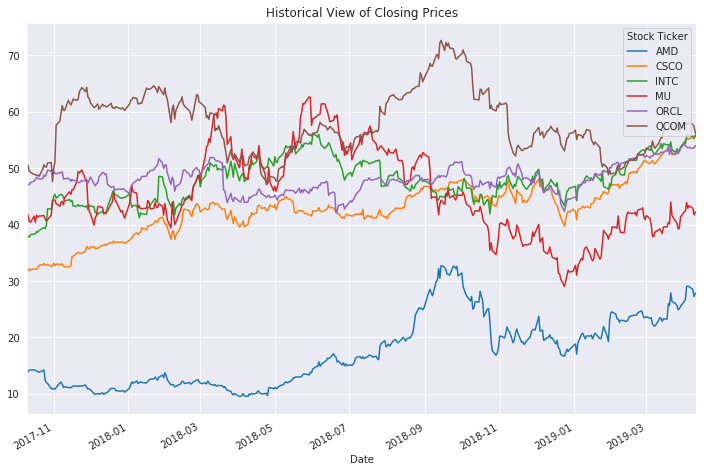

In [107]:
#  Display each stock's historical closing price time series to 
tech_stocks.xs(key='Adj Close', 
               axis=1, 
               level='Stock Description').plot(legend=True, 
                                               title='Historical View of Closing Prices',
                                               figsize=(12, 8))


## Exploring the Data
-----

### Data Structure
The pandas DataFrame **.shape** attribute displays a database's dimensionality

In [21]:
#  Shape of individual stock
AMD.shape

(378, 6)

In [22]:
#  Shape of the group of stocks
tech_stocks.shape

(378, 36)

The pandas DataFrame **.dtypes** attribute returns a series with the data type of
each column

In [23]:
#  Data type for each attribute of all stocks
tech_stocks.dtypes

AMD   High         float64
      Low          float64
      Open         float64
      Close        float64
      Volume         int64
      Adj Close    float64
CSCO  High         float64
      Low          float64
      Open         float64
      Close        float64
      Volume       float64
      Adj Close    float64
INTC  High         float64
      Low          float64
      Open         float64
      Close        float64
      Volume       float64
      Adj Close    float64
MU    High         float64
      Low          float64
      Open         float64
      Close        float64
      Volume         int64
      Adj Close    float64
NVDA  High         float64
      Low          float64
      Open         float64
      Close        float64
      Volume       float64
      Adj Close    float64
ORCL  High         float64
      Low          float64
      Open         float64
      Close        float64
      Volume       float64
      Adj Close    float64
dtype: object

The pandas DataFrame **.index** attribute returns the index of DataFrame

In [32]:
tech_stocks.index

DatetimeIndex(['2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
               '2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19',
               '2017-10-20', '2017-10-23',
               ...
               '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11'],
              dtype='datetime64[ns]', name='Date', length=378, freq=None)

The pandas DataFrame **.info()** method summarizes the data structure 

In [96]:
tech_stocks.transpose().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (AMD, High) to (QCOM, Adj Close)
Columns: 378 entries, 2017-10-10 to 2019-04-11
dtypes: float64(378)
memory usage: 108.1+ KB


### General Descriptive Statistics
**Descriptive Statistics** analyze data that describes or summarizes features of a database. These 
will be used to examine the data before it's preprocessed for predictive analysis. univariate analysis is the 
description of distribution, central tendency, dispersion, and shape for a single variable. 

The pandas Series' **.describe()** method generates a univariate analysis 

In [24]:
tech_stocks.describe()


AMD                                                    \
             High         Low        Open       Close        Volume   
count  378.000000  378.000000  378.000000  378.000000  3.780000e+02   
mean    17.925212   17.053095   17.494392   17.497381  7.927800e+07   
std      6.445175    6.008648    6.237150    6.233647  4.433242e+07   
min      9.770000    9.040000    9.080000    9.530000  1.103580e+07   
25%     12.042500   11.562500   11.730000   11.812500  4.679845e+07   
50%     16.850000   16.150000   16.510000   16.535000  6.578995e+07   
75%     22.387500   21.122499   21.807500   22.062500  9.965758e+07   
max     34.139999   32.189999   33.180000   32.720001  3.250584e+08   

                         CSCO                                      ...  \
        Adj Close        High         Low        Open       Close  ...   
count  378.000000  378.000000  378.000000  378.000000  378.000000  ...   
mean    17.497381   44.351429   43.520873   43.927645   43.942936  ...   
std      6.233647    4.773399    4.701594    4.735429    4.748134  ...   
min      9.530000   33.459999   33.169998   33.259998   33.259998  ...   
25%     11.812500   42.477501   41.395000   41.982500   42.022499  ...   
50%     16.535000   44.485001   43.580002   43.934999   44.014999  ...   
75%     22.062500   47.122500   46.107499   46.490000   46.672501  ...   
max     32.720001   55.950001   55.310001   55.930000   55.820000  ...   

             NVDA                                              ORCL  \
             Open       Close        Volume   Adj Close        High   
count  378.000000  378.000000  3.780000e+02  378.000000  378.000000   
mean    48.770661   48.815714  1.713119e+07   48.119006   60.872064   
std      2.352138    2.379814  8.005758e+06    2.457819    6.181522   
min     43.000000   42.689999  6.008300e+06   42.125469   49.799999   
25%     47.242501   47.242499  1.232412e+07   46.366159   55.992501   
50%     48.629999   48.639999  1.517330e+07   47.922512   59.139999   
75%     50.235002   50.397501  1.979278e+07   49.471994   65.755001   
max     54.410000   54.580002  7.517600e+07   54.336658   76.500000   

                                                                     
              Low        Open       Close        Volume   Adj Close  
count  378.000000  378.000000  378.000000  3.780000e+02  378.000000  
mean    59.521349   60.178545   60.177778  1.321581e+07   57.790137  
std      6.129623    6.134524    6.162590  7.722335e+06    5.654536  
min     48.560001   49.520000   49.400002  2.451300e+06   47.200085  
25%     54.704999   55.157499   55.270000  8.682200e+06   53.578655  
50%     57.925001   58.565001   58.655001  1.172295e+07   56.898390  
75%     64.587500   65.147501   65.194998  1.543420e+07   61.631814  
max     74.410004   75.370003   75.089996  8.096450e+07   72.641121  

[8 rows x 36 columns]

## Daily Returns
------
### Daily Percentage Change
To quantify daily change, **percentage change** is calculated as the percentage difference between the prior
and current element. Using this function on the 'Adj Close' attribute gives the daily
return for the technology stock

The pandas DataFrame **.pct_change()** method returns the percentage change 

In [92]:
#  Get the closing prices for each tech stock
stock_closing_prices = data.DataReader(ticker_index_data, 'yahoo', start, end)['Adj Close']


In [132]:
#  Calculate the Daily Return for each stock
tech_daily_returns = stock_closing_prices.pct_change()
tech_daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 2017-10-10 to 2019-04-11
Data columns (total 6 columns):
AMD     377 non-null float64
CSCO    377 non-null float64
INTC    377 non-null float64
MU      377 non-null float64
ORCL    377 non-null float64
QCOM    377 non-null float64
dtypes: float64(6)
memory usage: 20.7 KB


### Summary of Returns 
We can see from the Daily Returns sample statistics that each stock averaged a positive return over
the observed period. It also displays the minimum return (biggest price drop) and the maximum
return (biggest price increase) for each stock. Standard deviation describes which stocks
were most volatile. The shape of the distribution is described through the mean and median. The
descriptive statistics show that CSCO, MU, and QCOM have a higher median than mean, so they
are negatively skewed. This means that there are more positive returns above the mean than below the mean,
so the mean must be skewed by negative returns.   

In [94]:
tech_daily_returns.describe()


Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.002654,0.001569,0.001201,0.000476,0.000459,0.000457
std,0.039583,0.014942,0.019850,0.030250,0.014355,0.018723
min,-0.154454,-0.052529,-0.085890,-0.098708,-0.094321,-0.081633
25%,-0.016918,-0.005552,-0.008827,-0.016053,-0.005119,-0.008238
50%,0.002024,0.002065,0.000897,0.000892,0.001625,0.000617
75%,0.022670,0.008961,0.012217,0.018915,0.008056,0.009259
max,0.199481,0.055042,0.105519,0.113706,0.044507,0.127097


### Visualizing Percentage Daily Returns
The Univariate Daily Percentage Change

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f28fe600ac8>,
      dtype=object)

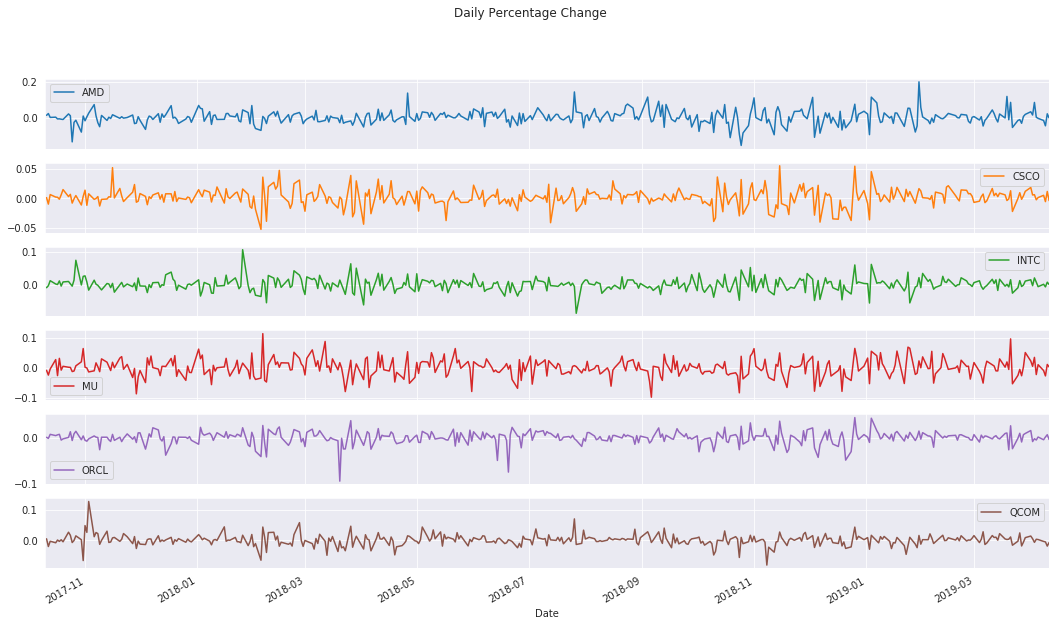

In [146]:
tech_daily_returns.plot(legend=True, title='Daily Percentage Change', subplots=True, figsize=(18,10))

Daily Percentage Change Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28f69c6908>,
      dtype=object)

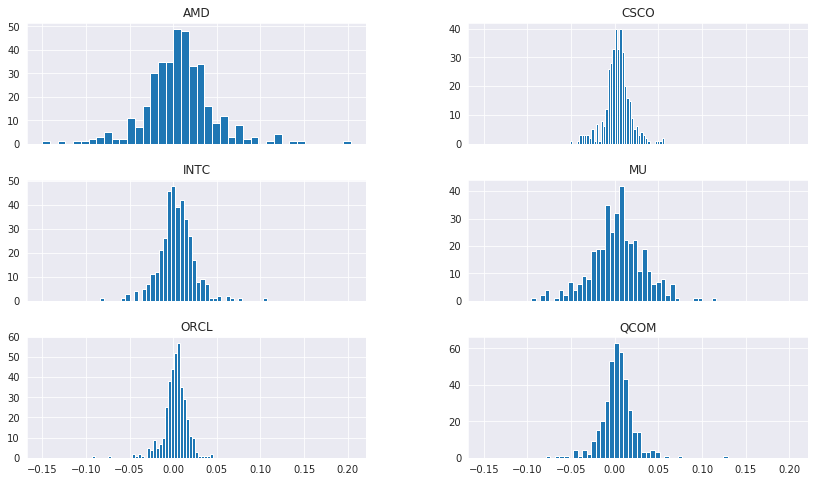

In [160]:
tech_daily_returns.hist(bins=40, sharex=True, rwidth=100, figsize=(14,8))


## Stationary Structure of Time Series